# **MODELO NEURONAL PARA PREDICCIÓN DE TIPOS DE CARNES**

## LIBRERIAS 

In [1]:
import numpy as np
import cv2
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.compat.v1.reset_default_graph()
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.models import Model
from PIL import Image

IMG_SIZE = 300
batch_size = 64 

## EXTRACCIÓN DE IMAGENES Y CREACIÓN DE DATA SET PARA ENTRENAMIENTO DEL MODELO

In [2]:
ds_train = tf.keras.utils.image_dataset_from_directory('./train', validation_split = 0.2, subset = "training", seed = 123, image_size = [IMG_SIZE,IMG_SIZE])
class_names = ds_train.class_names
num_classes = len(class_names)

Found 1633 files belonging to 8 classes.
Using 1307 files for training.


## CONFIGURACIÓN DEL MODELO

In [3]:
model_carnes = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.Conv2D(16,3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)   
])

## COMPILACIÓN DEL MODELO

In [4]:
model_carnes.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model_carnes.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

## ENTRENAMIENTO DEL MODELO

In [5]:
model_carnes.fit(ds_train,batch_size=batch_size,epochs=20)

Epoch 1/20
41/41 [==============================] - 96s 2s/step - loss: 1.6024 - accuracy: 0.5677
Epoch 2/20
41/41 [==============================] - 81s 2s/step - loss: 0.7677 - accuracy: 0.7230
Epoch 3/20
41/41 [==============================] - 80s 2s/step - loss: 0.5052 - accuracy: 0.8049
Epoch 4/20
41/41 [==============================] - 81s 2s/step - loss: 0.2740 - accuracy: 0.9105
Epoch 5/20
41/41 [==============================] - 78s 2s/step - loss: 0.1972 - accuracy: 0.9350
Epoch 6/20
41/41 [==============================] - 79s 2s/step - loss: 0.1080 - accuracy: 0.9709
Epoch 7/20
41/41 [==============================] - 79s 2s/step - loss: 0.0467 - accuracy: 0.9885
Epoch 8/20
41/41 [==============================] - 79s 2s/step - loss: 0.0702 - accuracy: 0.9793
Epoch 9/20
41/41 [==============================] - 79s 2s/step - loss: 0.0437 - accuracy: 0.9870
Epoch 10/20
41/41 [==============================] - 78s 2s/step - loss: 0.0398 - accuracy: 0.9893
Epoch 11/20
41/41 [

## EVALUACIÓN DEL MODELO CON LAS IMAGENES DE ENTRENAMIENTO

### Extracción de imagenes y etiquetas de todas las imagenes de entrenamiento

In [6]:
ds_train_total = tf.keras.utils.image_dataset_from_directory('./train', seed = 123, image_size = [IMG_SIZE,IMG_SIZE])

imagenes_lista = []
etiquetas_lista = []

for X_train, y_train in ds_train_total:
    imagenes_lista.append(X_train.numpy())
    etiquetas_lista.append(y_train.numpy())
    
X_train = np.concatenate(imagenes_lista)
y_train = np.concatenate(etiquetas_lista)

Found 1633 files belonging to 8 classes.


### Evaluación

In [7]:
predicted_train = model_carnes.predict(X_train)

y_predict_train = np.argmax(predicted_train,axis=1)
y_real_train = y_train
correct_train = np.where(y_predict_train==y_real_train)[0]

print("**EVALUACIÓN DEL MODELO CON EL DATA SET DE TEST\n")
print ('Valores de test correctos %s de %s'%(len(correct_train),len(y_real_train)))
print ('Porcentaje de exactitud %.2f'%(len(correct_train)/len(y_real_train)*100)+'%')
print ('\n**Matriz de confusión**')
confusion_matrix(y_real_train, y_predict_train)

52/52 [==============================] - 36s 520ms/step
**EVALUACIÓN DEL MODELO CON EL DATA SET DE TEST

Valores de test correctos 1603 de 1633
Porcentaje de exactitud 98.16%

**Matriz de confusión**


array([[ 53,   0,   8,   0,   0,   1,   0],
       [  0, 207,   0,   5,   0,   1,   0],
       [  0,   0, 105,   0,   0,   0,   0],
       [  0,   5,   0, 942,   0,   1,   1],
       [  0,   0,   0,   0,  37,   0,   0],
       [  0,   0,   3,   0,   0, 201,   0],
       [  0,   0,   0,   5,   0,   0,  58]], dtype=int64)

## EVALUACIÓN DEL MODELO CON LAS IMAGENES DE PRUEBAS

### Extracción de imagenes y etiquetas de todas las imagenes de pruebas

In [8]:
ds_test = tf.keras.utils.image_dataset_from_directory('./test', seed = 123, image_size = [IMG_SIZE,IMG_SIZE])

imagenes_lista = []
etiquetas_lista = []

for X_test, y_test in ds_test:
    imagenes_lista.append(X_test.numpy())
    etiquetas_lista.append(y_test.numpy())
    
X_test = np.concatenate(imagenes_lista)
y_test = np.concatenate(etiquetas_lista)

Found 810 files belonging to 8 classes.


### Evaluación

In [9]:
predicted_test = model_carnes.predict(X_test)

y_predict_test = np.argmax(predicted_test,axis=1)
y_real_test = y_test
correct_test = np.where(y_predict_test==y_real_test)[0]

print("**EVALUACIÓN DEL MODELO CON EL DATA SET DE TEST\n")
print ('Valores de test correctos %s de %s'%(len(correct_test),len(y_real_test)))
print ('Porcentaje de exactitud %.2f'%(len(correct_test)/len(y_real_test)*100)+'%')
print ('\n**Matriz de confusión**')
confusion_matrix(y_real_test, y_predict_test)


26/26 [==============================] - 13s 495ms/step
**EVALUACIÓN DEL MODELO CON EL DATA SET DE TEST

Valores de test correctos 693 de 810
Porcentaje de exactitud 85.56%

**Matriz de confusión**


array([[  0,   0,   0,   0,   0,   0,   1,   0],
       [  0,  26,   0,  21,   1,   0,   0,   0],
       [  0,   0,  72,   1,  11,   0,  12,   1],
       [  0,   5,   0,  38,   0,   0,   2,   0],
       [  0,   0,  11,   1, 425,   0,   7,  15],
       [  0,   1,   0,   1,   2,  15,   0,   0],
       [  0,   1,   7,   5,   4,   0,  97,   0],
       [  0,   0,   1,   0,   6,   0,   0,  20]], dtype=int64)

## PRUEBA EXTRA

1/1 [==============================] - 0s 73ms/step

La imagen es de la CLASS_07 con un 99.98% de exatitud
A continuación se presenta la imagen con la etiqueta, con lo que se valida el resultado obtenido.


(-0.5, 299.5, 299.5, -0.5)

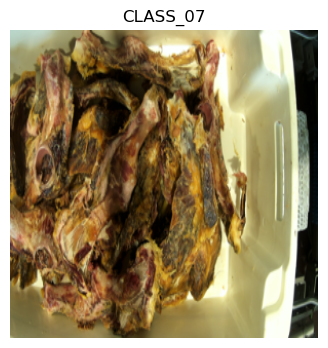

In [10]:
imagen = []
imagen = X_test[300]
imagen = np.array([imagen])
imagen = imagen.astype('float32')
imagen = imagen / 255.

prediccion = model_carnes.predict(imagen)

score = tf.nn.softmax(prediccion[0])
print("\nLa imagen es de la {} con un {:.2f}% de exatitud".format(class_names[np.argmax(score)], 100 * np.max(score)))
print("A continuación se presenta la imagen con la etiqueta, con lo que se valida el resultado obtenido.")

plt.figure(figsize=[4,4])
plt.subplot(1, 1, 1)
plt.imshow(imagen[0])
plt.title(class_names[y_test[300]])
plt.axis("off")

